In [1]:
#import libraries
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']  = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

In [2]:
#load Data
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mall_Data.csv")

In [3]:
df

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


In [4]:
df.drop(columns=["CustomerID"],inplace=True)

In [5]:
df

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [6]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

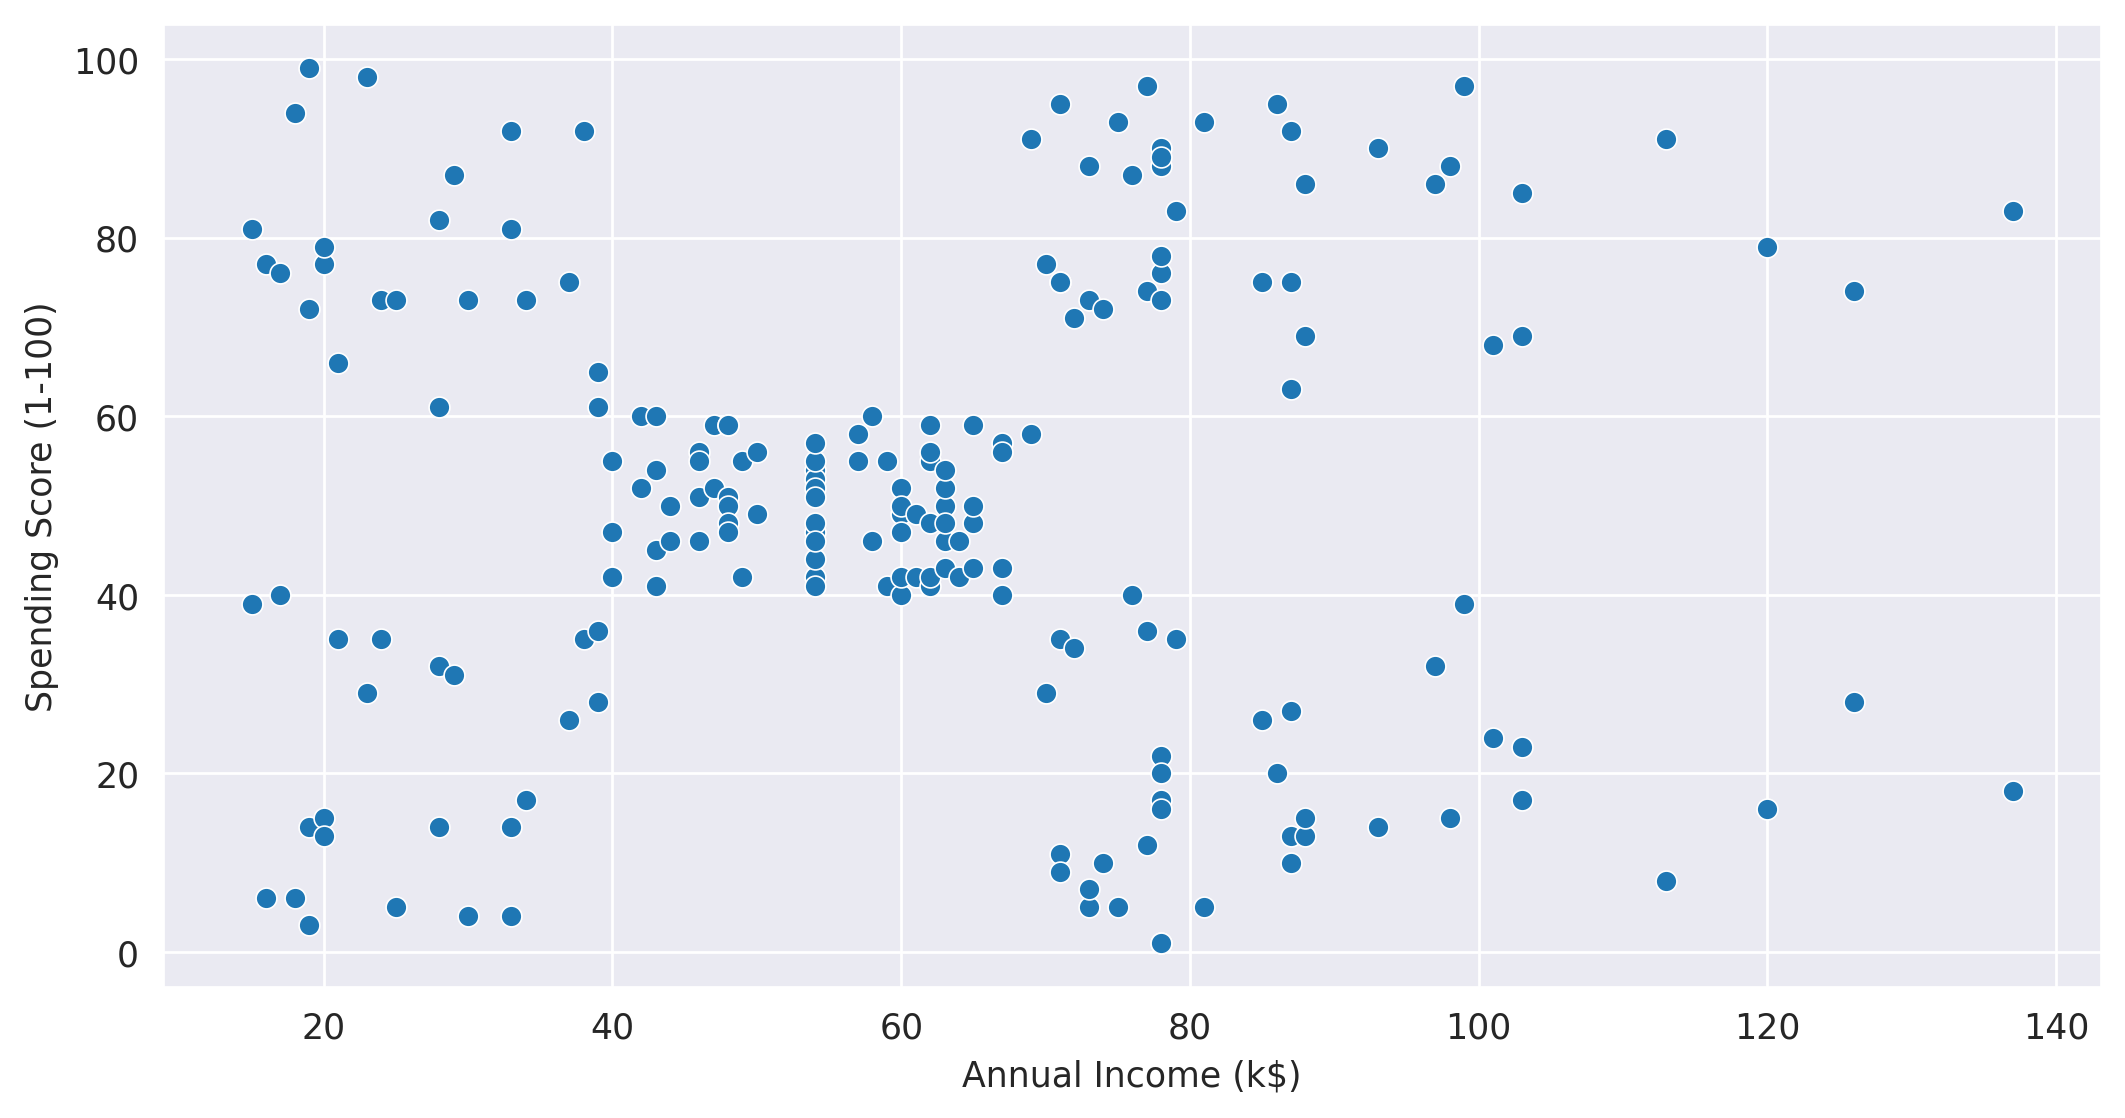

In [8]:
#data visulization
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"])

In [10]:
#Standardization
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [11]:
#Model Building
km = KMeans()
y =km.fit_predict(x)

In [12]:
#Cluster Center
km.cluster_centers_

array([[-1.35366972,  1.15873115],
       [ 0.12948524, -0.15473165],
       [ 0.68673384,  1.241219  ],
       [-1.32954532, -1.16358805],
       [ 1.87564575, -1.09476801],
       [ 1.87564575,  1.23452563],
       [-0.49242034,  0.05487957],
       [ 0.7489536 , -1.45651437]])

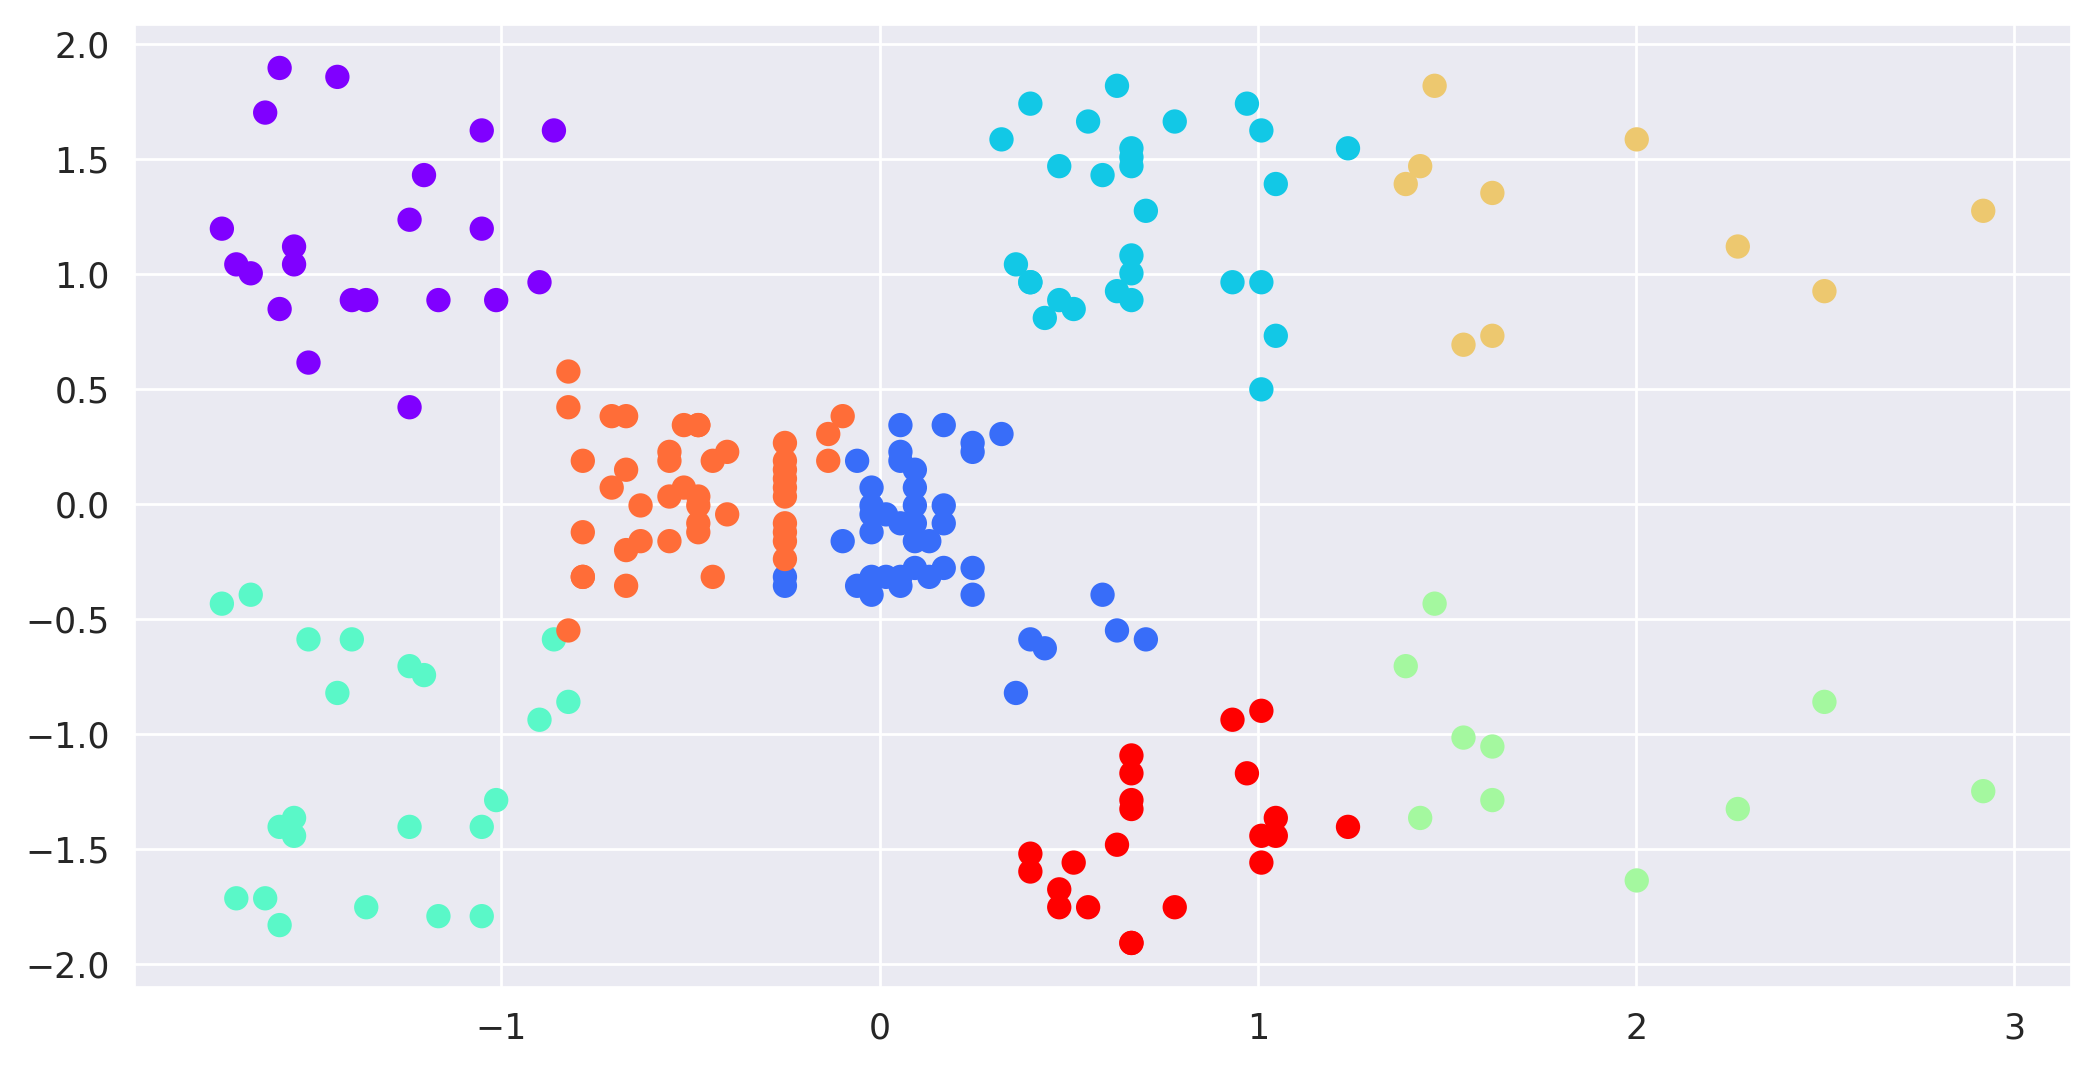

In [13]:
#Visualize The cluster
plt.scatter(x[:,0],x[:,1],c=y,cmap='rainbow')

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)


0.4564946059831134

# ***Elbow Graph***

In [15]:
wcss = []
for i in range(1,20):
  km =KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

In [16]:
wcss

[400.00000000000006,
 270.1559035072793,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.06779591451967,
 45.33255486071674,
 37.228187677585886,
 32.34583777956661,
 29.086148655529488,
 25.88086949233302,
 23.94922569633921,
 21.137947995873127,
 18.900154482400737,
 17.27891603127144,
 16.21789065716773,
 15.205365755013279,
 14.076048624716007,
 12.957089679311135]

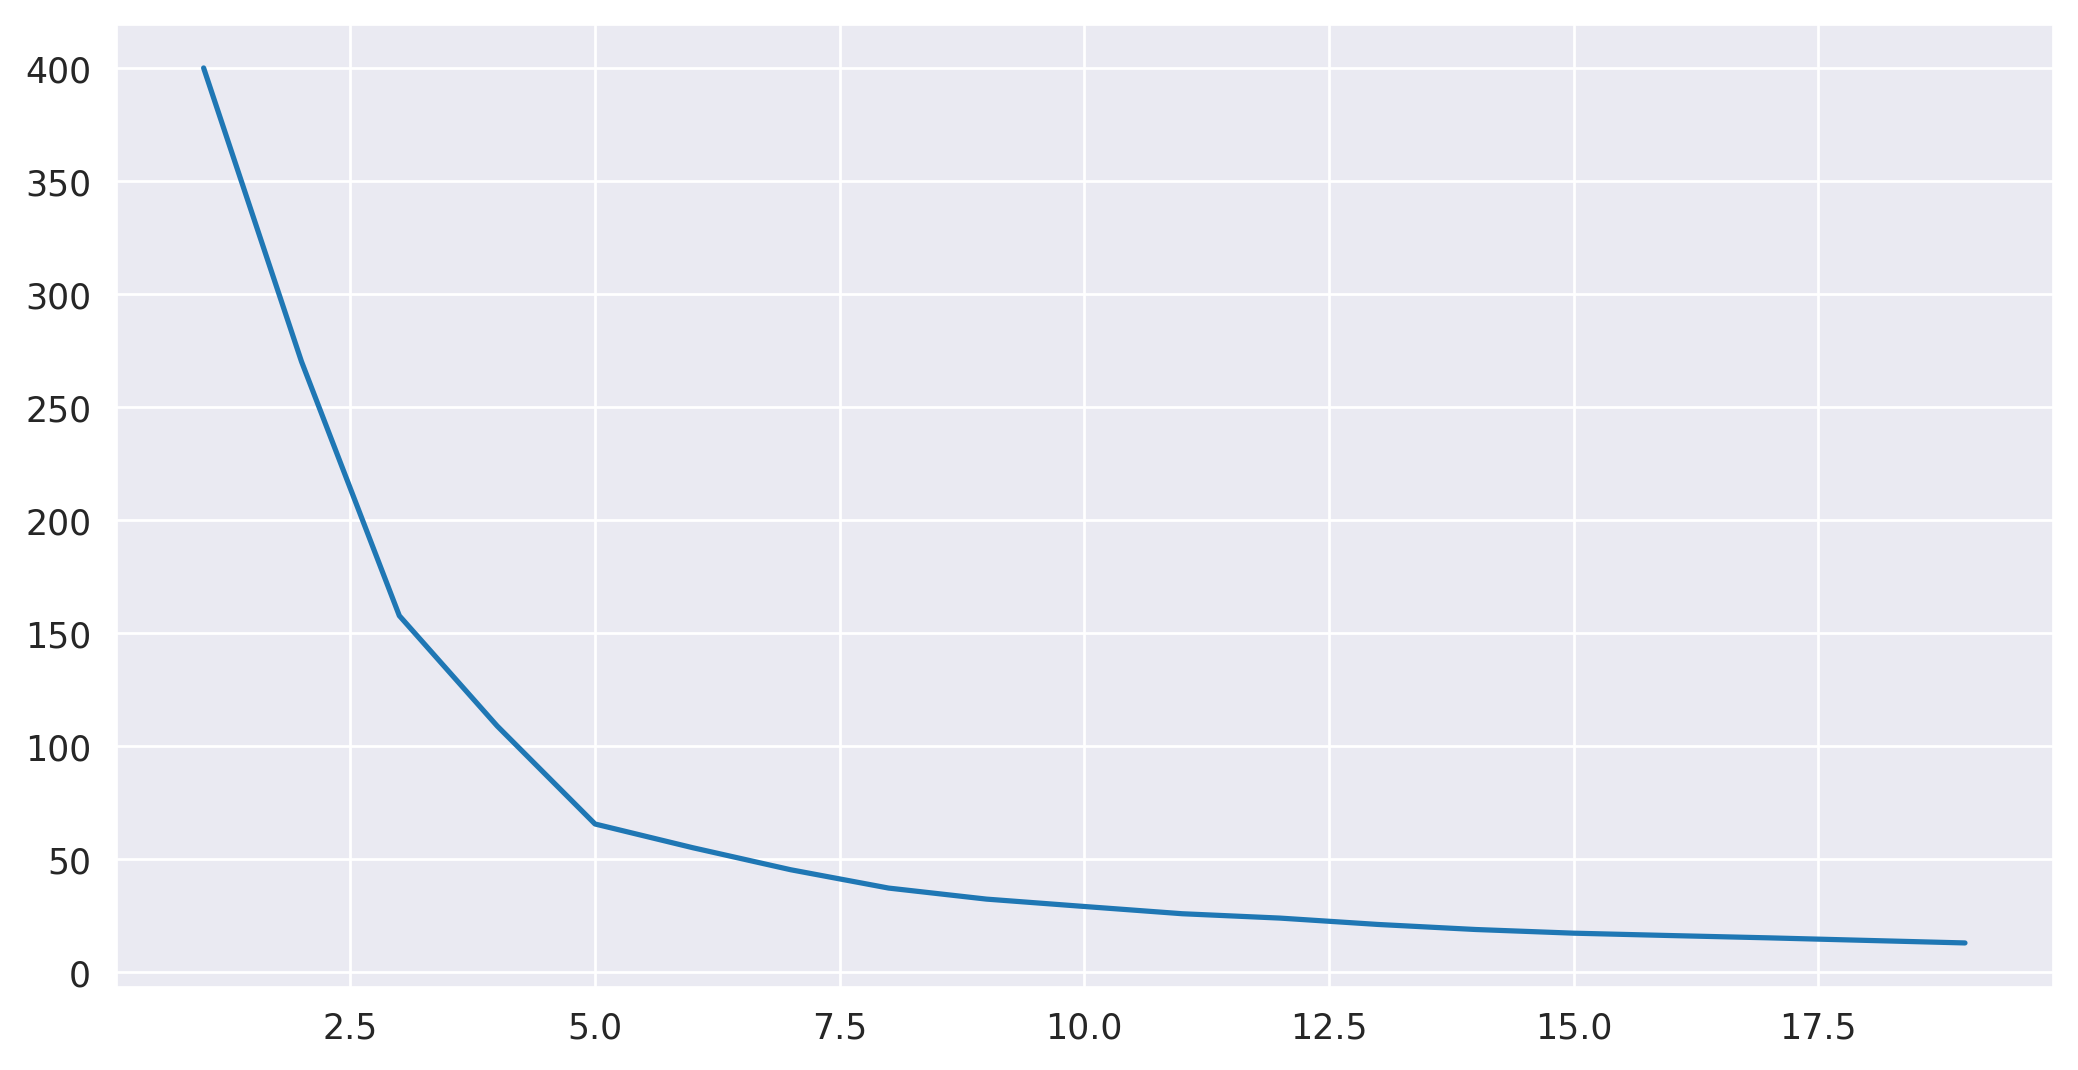

In [17]:
plt.plot(range(1,20),wcss)

# *FINAL Model*

In [22]:
km =KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

In [23]:
km.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907]])

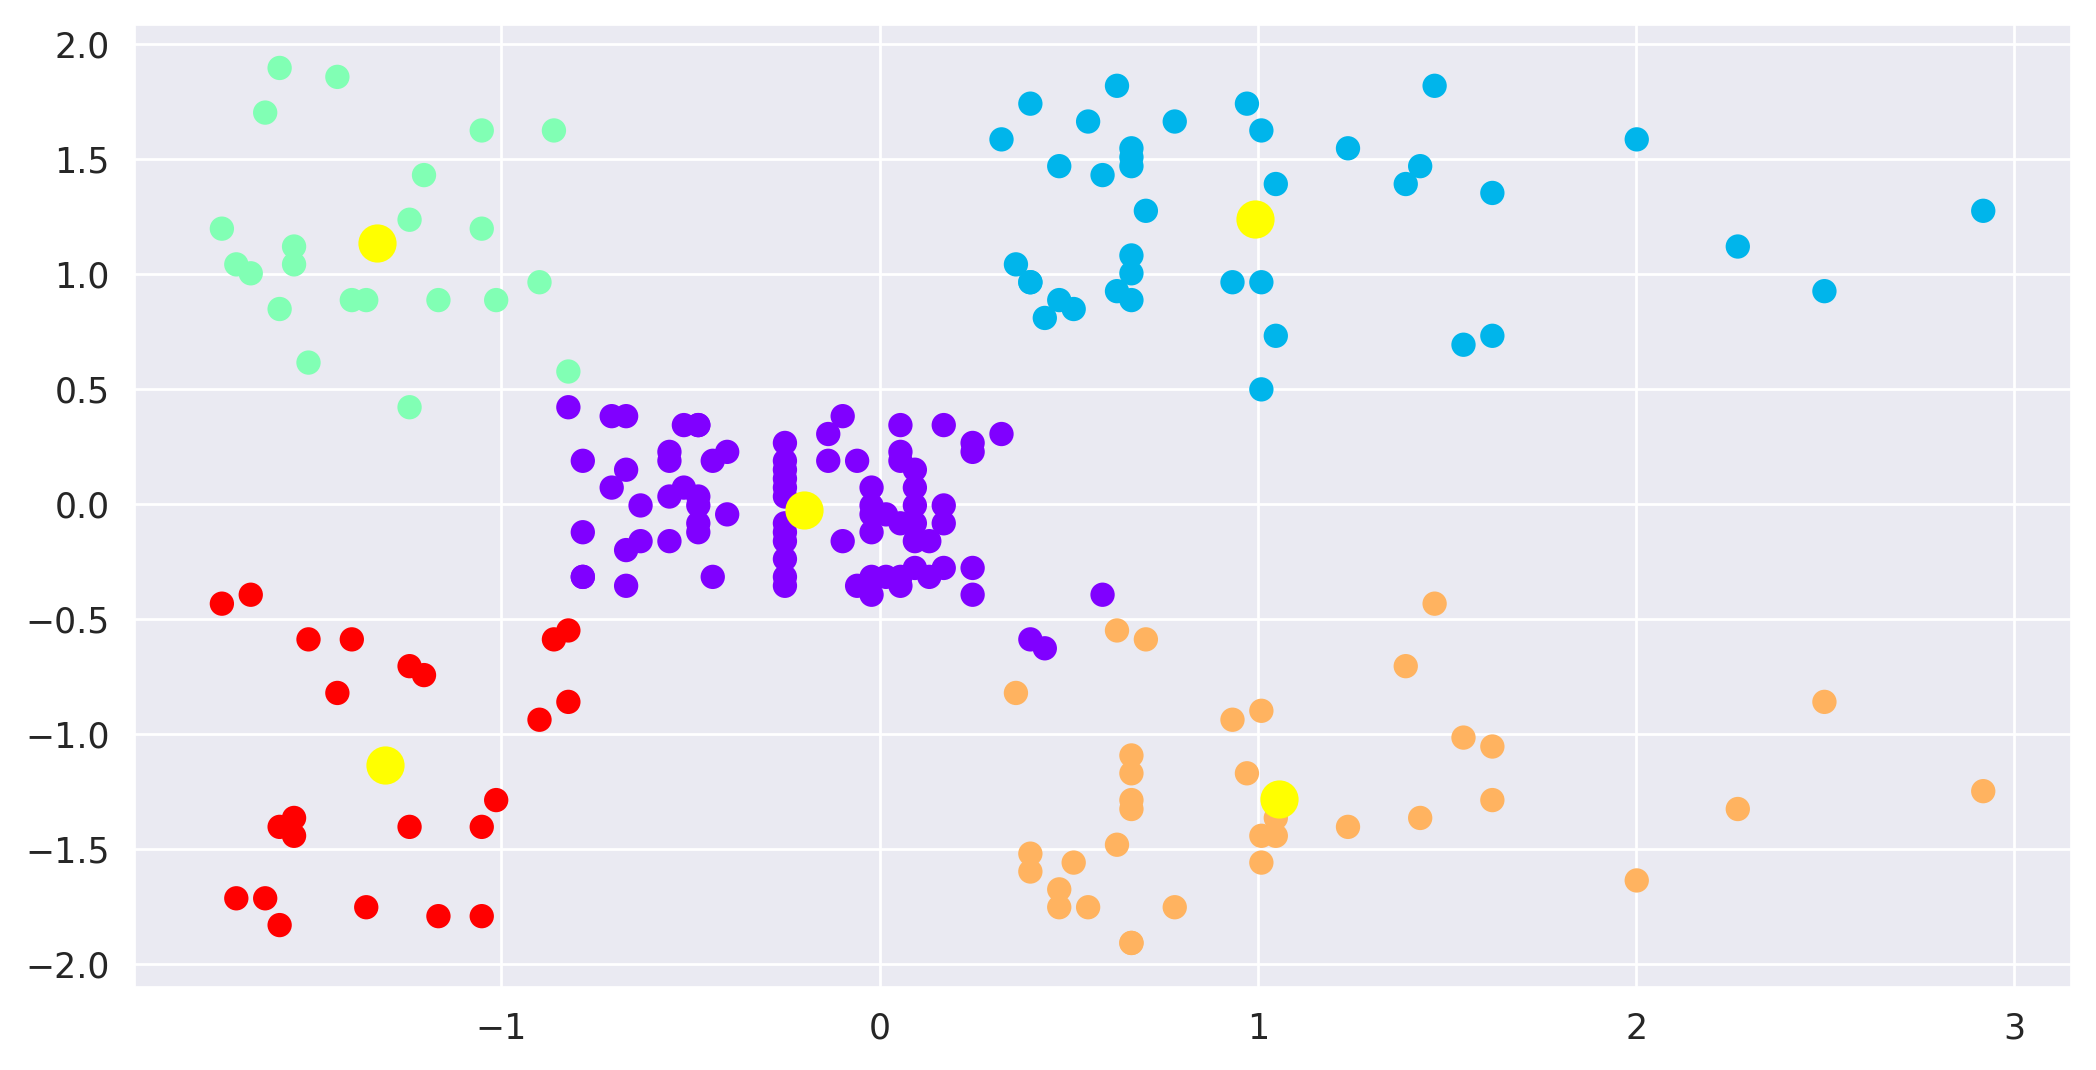

In [21]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap="rainbow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="Yellow",s=100)